In [21]:
arch_map = {'': 'Baseline',
            'AC': 'Adaptive Clipper',
            'MF': 'Median Filter',
            'ranger': 'Ranger',
            'SR': 'Swap ReLU6',
            'TMR': 'TMR'
 }

In [22]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import torch

os.chdir("/home/bepi/Desktop/Ph.D_/projects/APP_FI/data/")
path = os.getcwd()

log_folders = [file_path for file_path in os.listdir("/home/bepi/Desktop/Ph.D_/projects/APP_FI/data/") if file_path.startswith("FSIM_N_HPC_mobilenet") and not file_path.endswith('gz')]
# print(log_folders)

general_report = pd.DataFrame([])
new_report = pd.DataFrame([])
for layer_conf in log_folders:
    model = layer_conf.split('_')[3]
    architecture = ''
    if len(layer_conf.split('_')) == 5:
        architecture = layer_conf.split('_')[4]

    if layer_conf != ".DS_Store":
        folder_path = os.path.join(path,  layer_conf)
        for cnf in [files for files in os.listdir(folder_path) if files != ".DS_Store" and not files.endswith('.log')]:
            file_path = os.path.join(folder_path, cnf)

            report_path = os.path.join(file_path, "fsim_full_report.csv")
            report = pd.read_csv(report_path)
            report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"

            report.drop(columns=['Unnamed: 0'], inplace=True)
            
            report['MRAD']=abs(100*(report['fault_ACC@1']-report['gold_ACC@1'])/report['gold_ACC@1'])
            report['MRADk']=abs(100*(report['fault_ACC@k']-report['gold_ACC@k'])/report['gold_ACC@k'])
            report['AbsAD']=abs((report['fault_ACC@1']-report['gold_ACC@1']))
            report['AbsADk']=abs((report['fault_ACC@k']-report['gold_ACC@k']))

            report['MRF1D']=abs(100*(report['fault_f1@1']-report['goldenf1_1'])/report['goldenf1_1'])
            report['MRF1Dk']=abs(100*(report['fault_f1@k']-report['goldenf1_k'])/report['goldenf1_k'])
            report['AbsF1D']=abs((report['fault_f1@1']-report['goldenf1_1']))
            report['AbsF1Dk']=abs((report['fault_f1@k']-report['goldenf1_k']))

            report['MRRD']=abs(100*(report['fault_rec@1']-report['goldenrec_1'])/report['goldenrec_1'])
            report['MRRDk']=abs(100*(report['fault_rec@k']-report['goldenrec_k'])/report['goldenrec_k'])
            report['AbsrD']=abs((report['fault_rec@1']-report['goldenrec_1']))
            report['AbsRDk']=abs((report['fault_rec@k']-report['goldenrec_k']))

            report['MRPD']=abs(100*(report['fault_prec@1']-report['goldenprec_1'])/report['goldenprec_1'])
            report['MRPDk']=abs(100*(report['fault_prec@k']-report['goldenprec_k'])/report['goldenprec_k'])
            report['AbsPD']=abs((report['fault_prec@1']-report['goldenprec_1']))
            report['AbsPDk']=abs((report['fault_prec@k']-report['goldenprec_k']))
            report['model'] = 'LeNet5'
            report['Architecture'] = arch_map[architecture]
            report['block_fault_rate'] = report['block_fault_rate']*100
            report['neuron_fault_rate'] = report['neuron_fault_rate']*100
            general_report = pd.concat([general_report, report], axis=0, ignore_index=True)

            new_path = os.path.join(file_path, "Misclassified_images_report.csv")
            additional_report = pd.read_csv(new_path)
            additional_report['model'] = 'LeNet5'
            additional_report['Architecture'] = arch_map[architecture]
            new_report = pd.concat([new_report, additional_report], axis=0, ignore_index=True)
            new_report['conf_detail'] = cnf.split("_")[0] if cnf.split("_")[0] != "cnf77" else "teacher_cnf"



In [23]:
general_report['BER'] = general_report['neuron_fault_rate'] * general_report['block_fault_rate']

In [24]:
general_report['BER']

0         0.16
1         0.16
2         0.16
3         0.16
4         0.16
         ...  
32495    16.00
32496    16.00
32497    16.00
32498    16.00
32499    16.00
Name: BER, Length: 32500, dtype: float64

In [20]:
general_report[general_report['Architecture'] == 'Adaptive Clipper'][general_report['BER']==16]['fault_ACC@1'].mean()

/tmp/ipykernel_17621/1825664074.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  general_report[general_report['Architecture'] == 'Adaptive Clipper'][general_report['BER']==16]['fault_ACC@1'].mean()


46.07692307692308

In [17]:
# TODO: check nan/inf values
general_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32500 entries, 0 to 32499
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   layer_start        32500 non-null  int64  
 1   layer_stop         32500 non-null  int64  
 2   size_tail_y        32500 non-null  int64  
 3   size_tail_x        32500 non-null  int64  
 4   block_fault_rate   32500 non-null  float64
 5   neuron_fault_rate  32500 non-null  float64
 6   bit_faulty_pos     32500 non-null  int64  
 7   gold_ACC@1         32500 non-null  float64
 8   gold_ACC@k         32500 non-null  float64
 9   img_Top1_Crit      32500 non-null  int64  
 10  img_Top1_SDC       32500 non-null  int64  
 11  img_Top1_Masked    32500 non-null  int64  
 12  img_Topk_Crit      32500 non-null  int64  
 13  img_Topk_SDC       32500 non-null  int64  
 14  img_Topk_Masked    32500 non-null  int64  
 15  fault_ACC@1        32500 non-null  float64
 16  fault_ACC@k        325

## Accuracy of the corrupted NN
#### (The accuracy is evaluated considering only the top1 prediction)

In [25]:
general_report['BER'] = general_report['neuron_fault_rate'] * general_report['block_fault_rate']

general_report[general_report['BER']==general_report['BER'].unique()[0]].groupby('Architecture')['fault_ACC@1'].mean()

Architecture
Adaptive Clipper    55.630769
Baseline            71.246154
Ranger              71.600000
Swap ReLU6          66.200000
TMR                 72.969231
Name: fault_ACC@1, dtype: float64

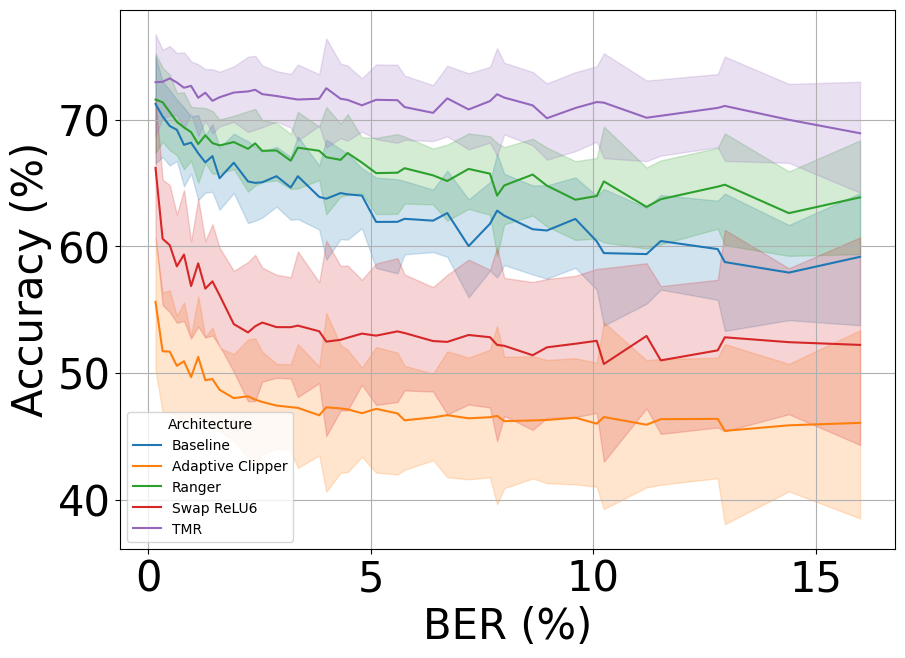

In [26]:
general_report['BER'] = general_report['neuron_fault_rate'] * general_report['block_fault_rate']
from matplotlib.ticker import MaxNLocator

fig, ax = plt.subplots(1,1,figsize=(10,7))
legend_order = ['Baseline', 'Adaptive Clipper', 'Ranger', 'Swap ReLU6', 'TMR']
sns.lineplot(data=general_report, x='BER', y='fault_ACC@1', hue='Architecture', ax = ax, hue_order=legend_order)

ax.grid()
ax.set_ylabel('Accuracy (%)', fontsize=30)
ax.set_xlabel('BER (%)', fontsize=30)
ax.tick_params(axis='x', labelsize=30)
ax.tick_params(axis='y', labelsize=30)
# ax.set_xticklabels(labels=general_report['BER'].unique())
# ax.tick_params(axis='x', labelsize=30)
# x_min, x_max = general_report['BER'].min(), general_report['BER'].max()

# ax.xaxis.set_major_locator(MaxNLocator(nbins=10))
# x_ticks = np.linspace(x_min, x_max, 10)
# ax.set_xticklabels([f'{tick:.2f}' for tick in general_report['BER'].unique()], rotation=0)
# ax.set_xlim(left=-2.5)

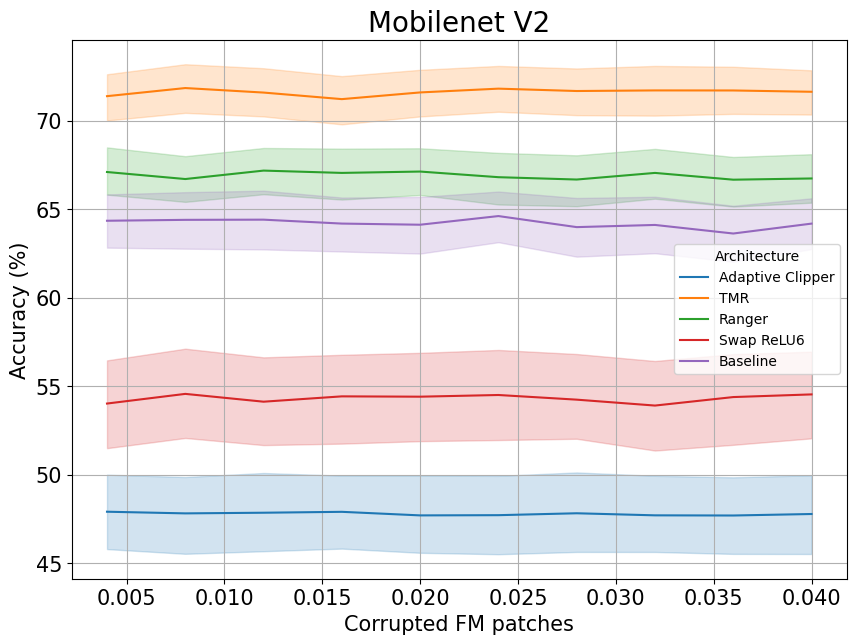

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.lineplot(data=general_report, x='block_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
# sns.scatterplot(data=general_report, x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
ax.set_title('Mobilenet V2', fontsize=20)
ax.grid()
ax.set_ylabel('Accuracy (%)', fontsize=15)
ax.set_xlabel('Corrupted FM patches', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

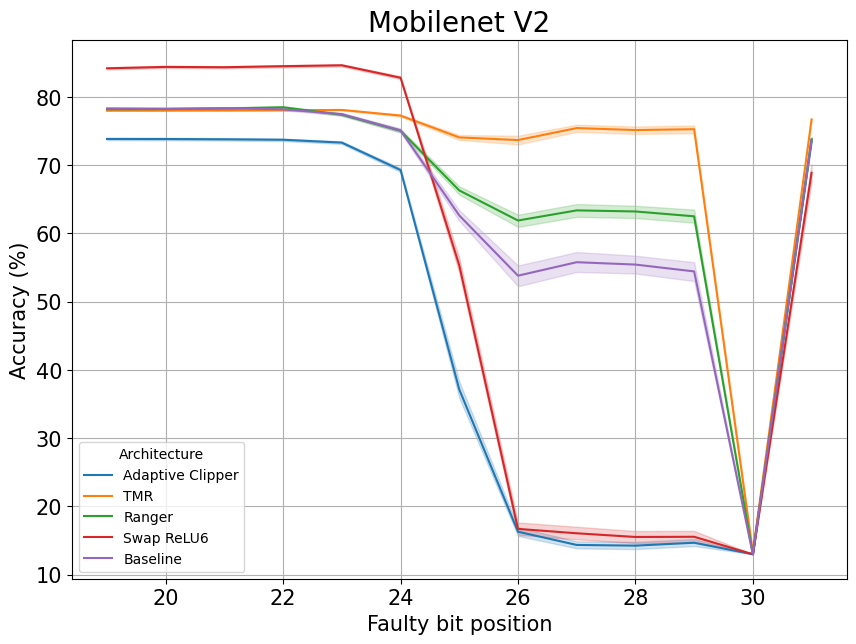

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.lineplot(data=general_report, x='bit_faulty_pos', y='fault_ACC@1', hue='Architecture', ax = ax)
# sns.scatterplot(data=general_report, x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
ax.set_title('Mobilenet V2', fontsize=20)
ax.grid()
ax.set_ylabel('Accuracy (%)', fontsize=15)
ax.set_xlabel('Faulty bit position', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

### Let's isolate bit 30

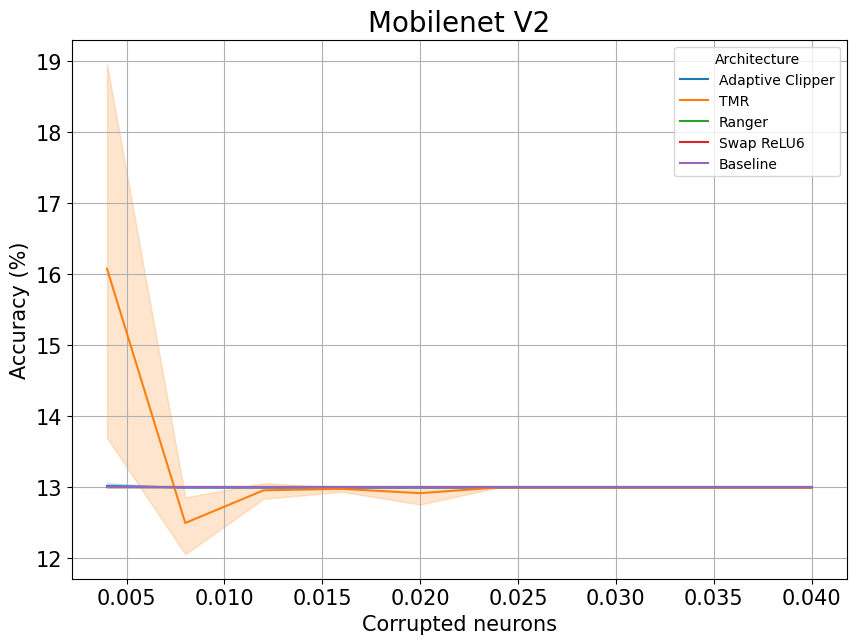

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.lineplot(data=general_report[general_report['bit_faulty_pos']==30], x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
# sns.boxplot(data=general_report[general_report['bit_faulty_pos']==30], x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
ax.set_title('Mobilenet V2', fontsize=20)
ax.grid()
ax.set_ylabel('Accuracy (%)', fontsize=15)
ax.set_xlabel('Corrupted neurons', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

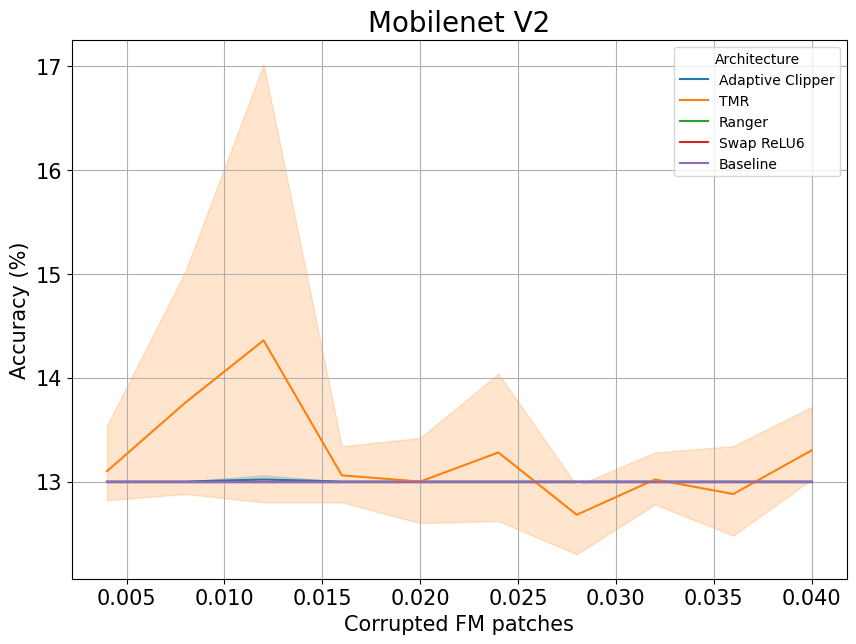

In [8]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.lineplot(data=general_report[general_report['bit_faulty_pos']==30], x='block_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
# sns.scatterplot(data=general_report, x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
ax.set_title('Mobilenet V2', fontsize=20)
ax.grid()
ax.set_ylabel('Accuracy (%)', fontsize=15)
ax.set_xlabel('Corrupted FM patches', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

## NaN values in NN output

In [9]:
new_report.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 757325 entries, 0 to 757324
Data columns (total 34 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         757325 non-null  int64  
 1   FaultID            757325 non-null  object 
 2   imID               757325 non-null  int64  
 3   layer_start        757325 non-null  int64  
 4   layer_stop         757325 non-null  int64  
 5   size_tail_y        757325 non-null  int64  
 6   size_tail_x        757325 non-null  int64  
 7   block_fault_rate   757325 non-null  float64
 8   neuron_fault_rate  757325 non-null  float64
 9   bit_faulty_pos     757325 non-null  int64  
 10  G_Target           757325 non-null  int64  
 11  F_clas0            757325 non-null  int64  
 12  F_clas1            757325 non-null  int64  
 13  F_clas2            757325 non-null  int64  
 14  F_clas3            757325 non-null  int64  
 15  F_clas4            757325 non-null  int64  
 16  F_

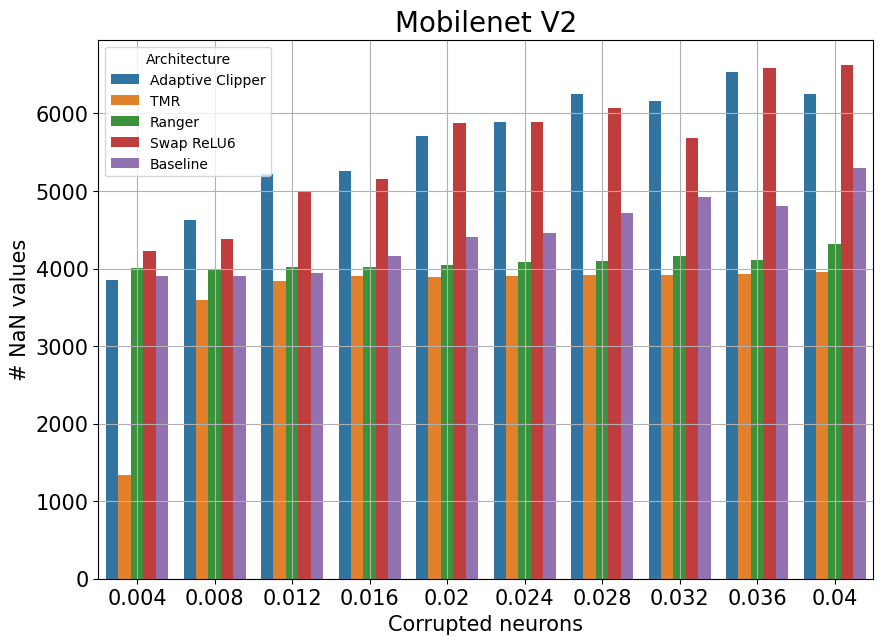

In [10]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.countplot(data = new_report.query("F_pred0.isnull()"), x='neuron_fault_rate', hue='Architecture',  ax = ax)

ax.set_title('Mobilenet V2', fontsize=20)
ax.grid()
ax.set_ylabel('# NaN values', fontsize=15)
ax.set_xlabel('Corrupted neurons', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
# fig.legend()

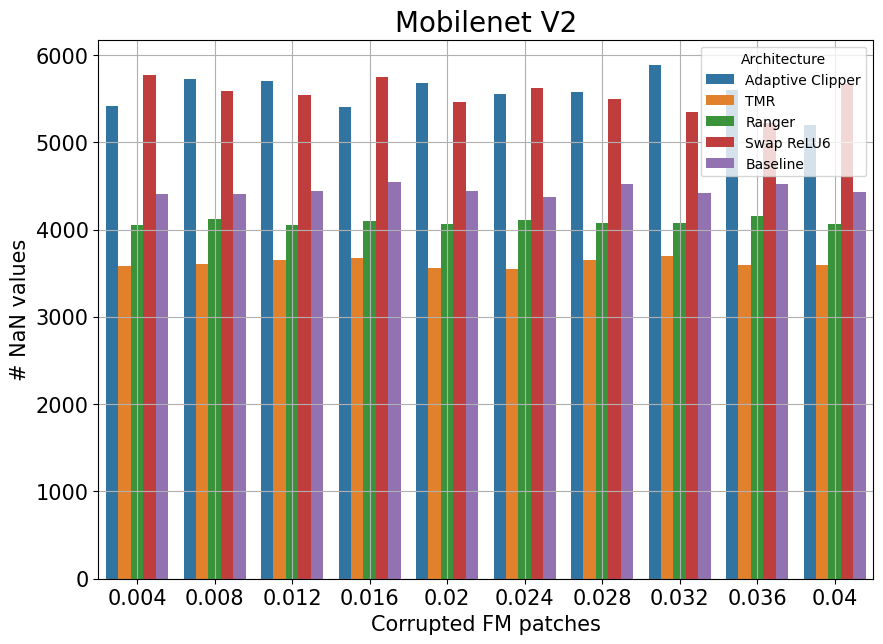

In [12]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.countplot(data = new_report.query("F_pred0.isnull()"), x='block_fault_rate', hue='Architecture',  ax = ax)

ax.set_title('Mobilenet V2', fontsize=20)
ax.grid()
ax.set_ylabel('# NaN values', fontsize=15)
ax.set_xlabel('Corrupted FM patches', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

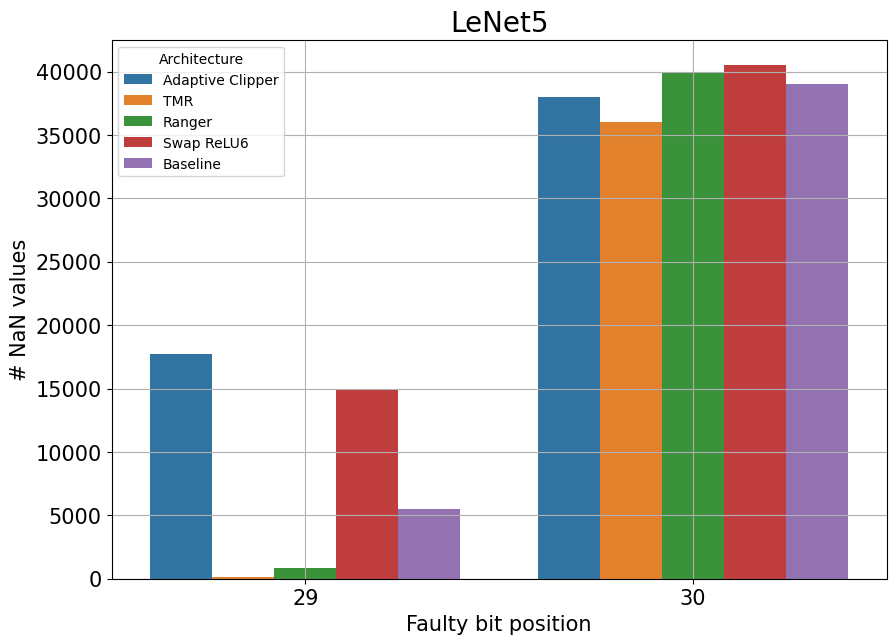

In [13]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
sns.countplot(data = new_report.query("F_pred0.isnull()"), x='bit_faulty_pos', hue='Architecture',  ax = ax)

ax.set_title('Mobilenet V2', fontsize=20)
ax.grid()
ax.set_ylabel('# NaN values', fontsize=15)
ax.set_xlabel('Faulty bit position', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

## Top1 - Top2 
#### It is worth to explore also this metric becuase, when models are deployed into a CPS, if the difference between the top1 and top2 predictions are too close, so if the model is not confident enough on the top1 prediction, it is discarded.
(A reference is needed)

In [85]:
new_report['top_diff'] = abs(new_report['F_pred0'] - new_report['F_pred1'])/abs(new_report['F_pred0']+new_report['F_pred1']+new_report['F_pred2']+new_report['F_pred3']+new_report['F_pred4'])

new_report['top_diff'].describe()

count    5.245720e+05
mean     6.199620e+00
std      1.678167e+03
min      1.449107e-07
25%      6.117022e-02
50%      1.470458e-01
75%      4.470876e-01
max      1.197028e+06
Name: top_diff, dtype: float64

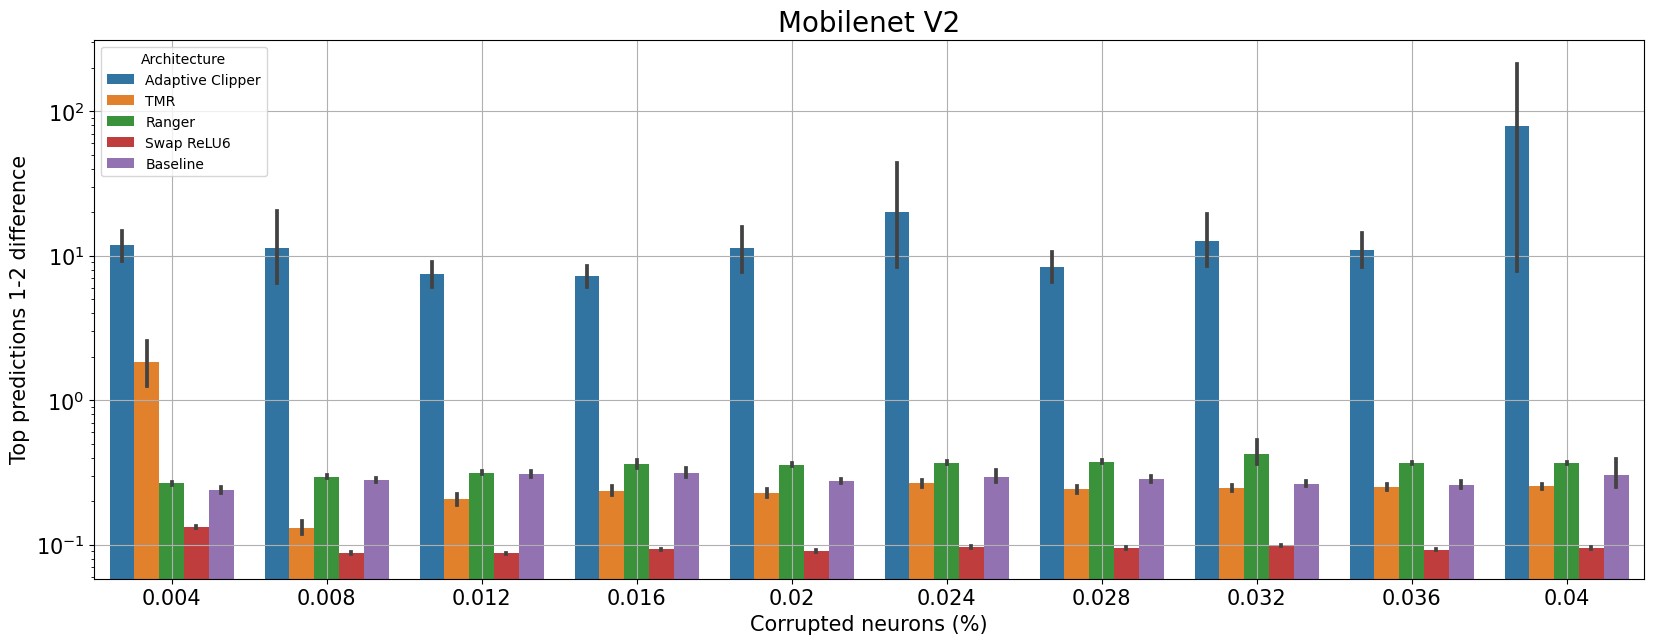

In [86]:
fig, ax = plt.subplots(1,1,figsize=(20,7))
sns.barplot(data=new_report, x='neuron_fault_rate', y='top_diff', hue='Architecture', ax = ax)
# sns.boxplot(data=general_report[general_report['bit_faulty_pos']==30], x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
ax.set_title('Mobilenet V2', fontsize=20)
ax.grid()
ax.set_yscale('log')
ax.set_ylabel('Top predictions 1-2 difference', fontsize=15)
ax.set_xlabel('Corrupted neurons (%)', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

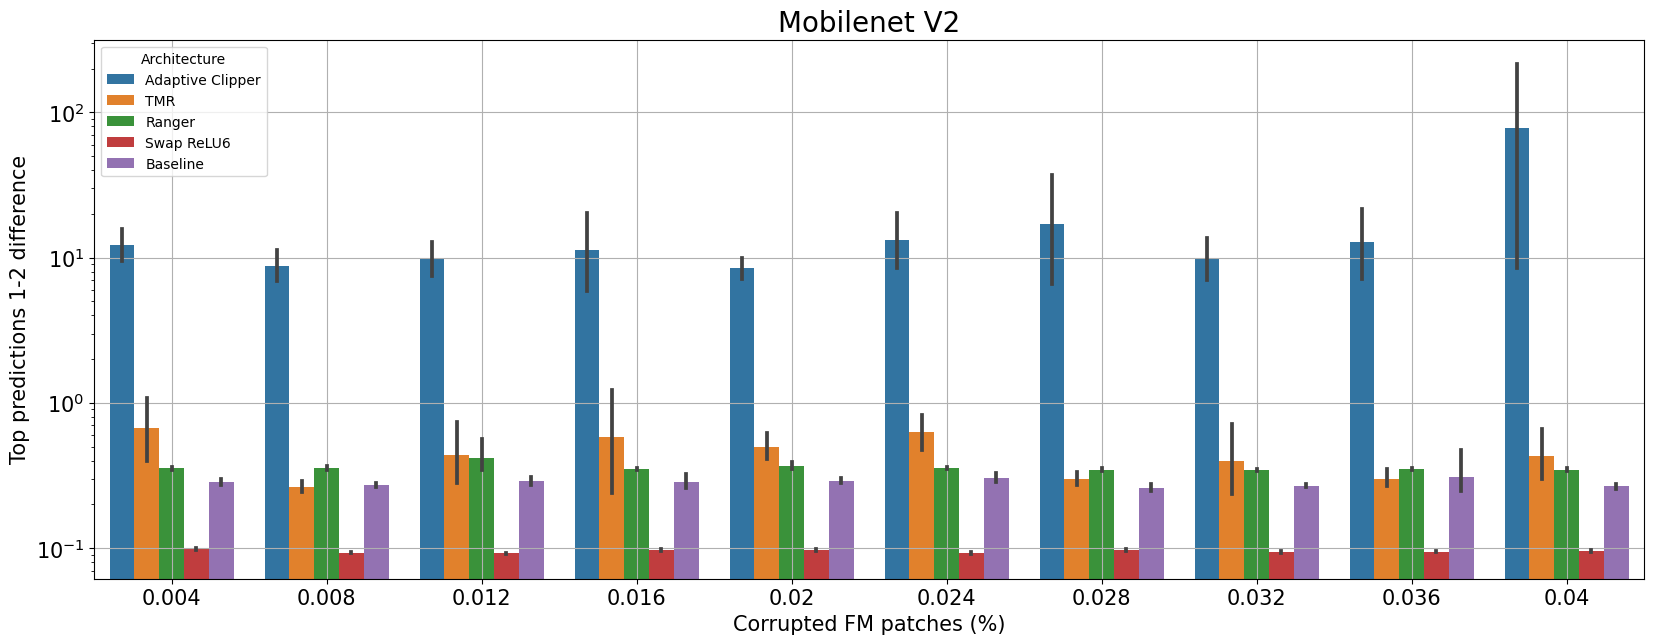

In [87]:
fig, ax = plt.subplots(1,1,figsize=(20,7))
sns.barplot(data=new_report, x='block_fault_rate', y='top_diff', hue='Architecture', ax = ax)
# sns.boxplot(data=general_report[general_report['bit_faulty_pos']==30], x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
ax.set_title('Mobilenet V2', fontsize=20)
ax.grid()
ax.set_yscale('log')
ax.set_ylabel('Top predictions 1-2 difference', fontsize=15)
ax.set_xlabel('Corrupted FM patches (%)', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

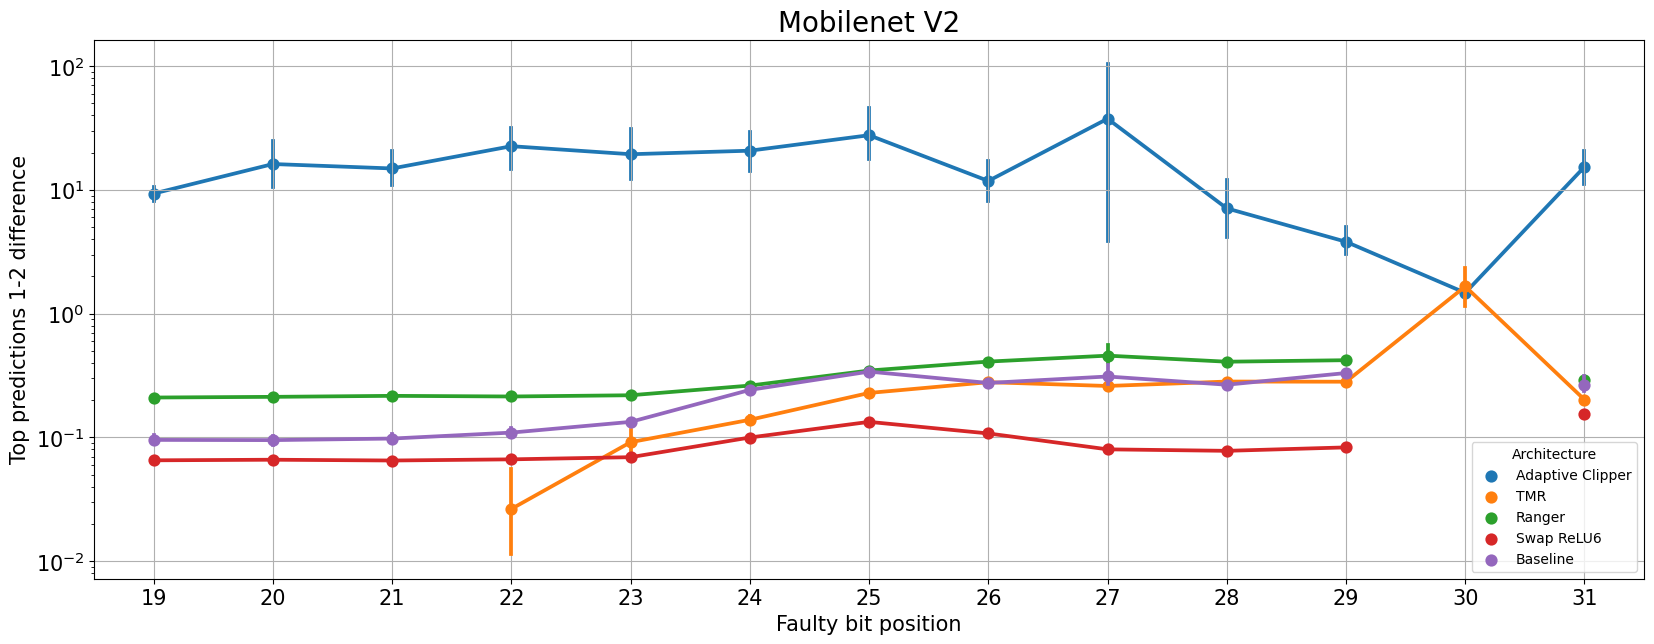

In [88]:
fig, ax = plt.subplots(1,1,figsize=(20,7))
# sns.lineplot(data=new_report, x='bit_faulty_pos', y='top_diff', hue='Architecture', ax = ax)
sns.pointplot(data=new_report, x='bit_faulty_pos', y='top_diff', hue='Architecture', ax = ax)
# sns.boxplot(data=general_report[general_report['bit_faulty_pos']==30], x='neuron_fault_rate', y='fault_ACC@1', hue='Architecture', ax = ax)
ax.set_title('Mobilenet V2', fontsize=20)
ax.grid()
ax.set_yscale('log')
ax.set_ylabel('Top predictions 1-2 difference', fontsize=15)
ax.set_xlabel('Faulty bit position', fontsize=15)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)

#### Filter by correct predictions
Correctness is evaluated w.r.t. the ground truth

In [18]:
new_report.columns

Index(['Unnamed: 0', 'FaultID', 'imID', 'layer_start', 'layer_stop',
       'size_tail_y', 'size_tail_x', 'block_fault_rate', 'neuron_fault_rate',
       'bit_faulty_pos', 'G_Target', 'F_clas0', 'F_clas1', 'F_clas2',
       'F_clas3', 'F_clas4', 'F_pred0', 'F_pred1', 'F_pred2', 'F_pred3',
       'F_pred4', 'G_clas0', 'G_clas1', 'G_clas2', 'G_clas3', 'G_clas4',
       'G_pred0', 'G_pred1', 'G_pred2', 'G_pred3', 'G_pred4', 'model',
       'Architecture', 'conf_detail', 'top_diff'],
      dtype='object')

In [19]:
correct_predictions = new_report[new_report['G_Target']==new_report['F_clas0']]
len(correct_predictions)

0

Correct predictions is empty which means that, when LeNet5 predictions are affected by the induced error, all faults are "critical" (i.e., the prediction has changed)

In [20]:
arch_map = {'': 'Baseline',
            'AC': 'Adaptive Clipper',
            'MF': 'Median Filter',
            'ranger': 'Ranger',
            'SR': 'Swap ReLU6',
            'TMR': 'TMR'}

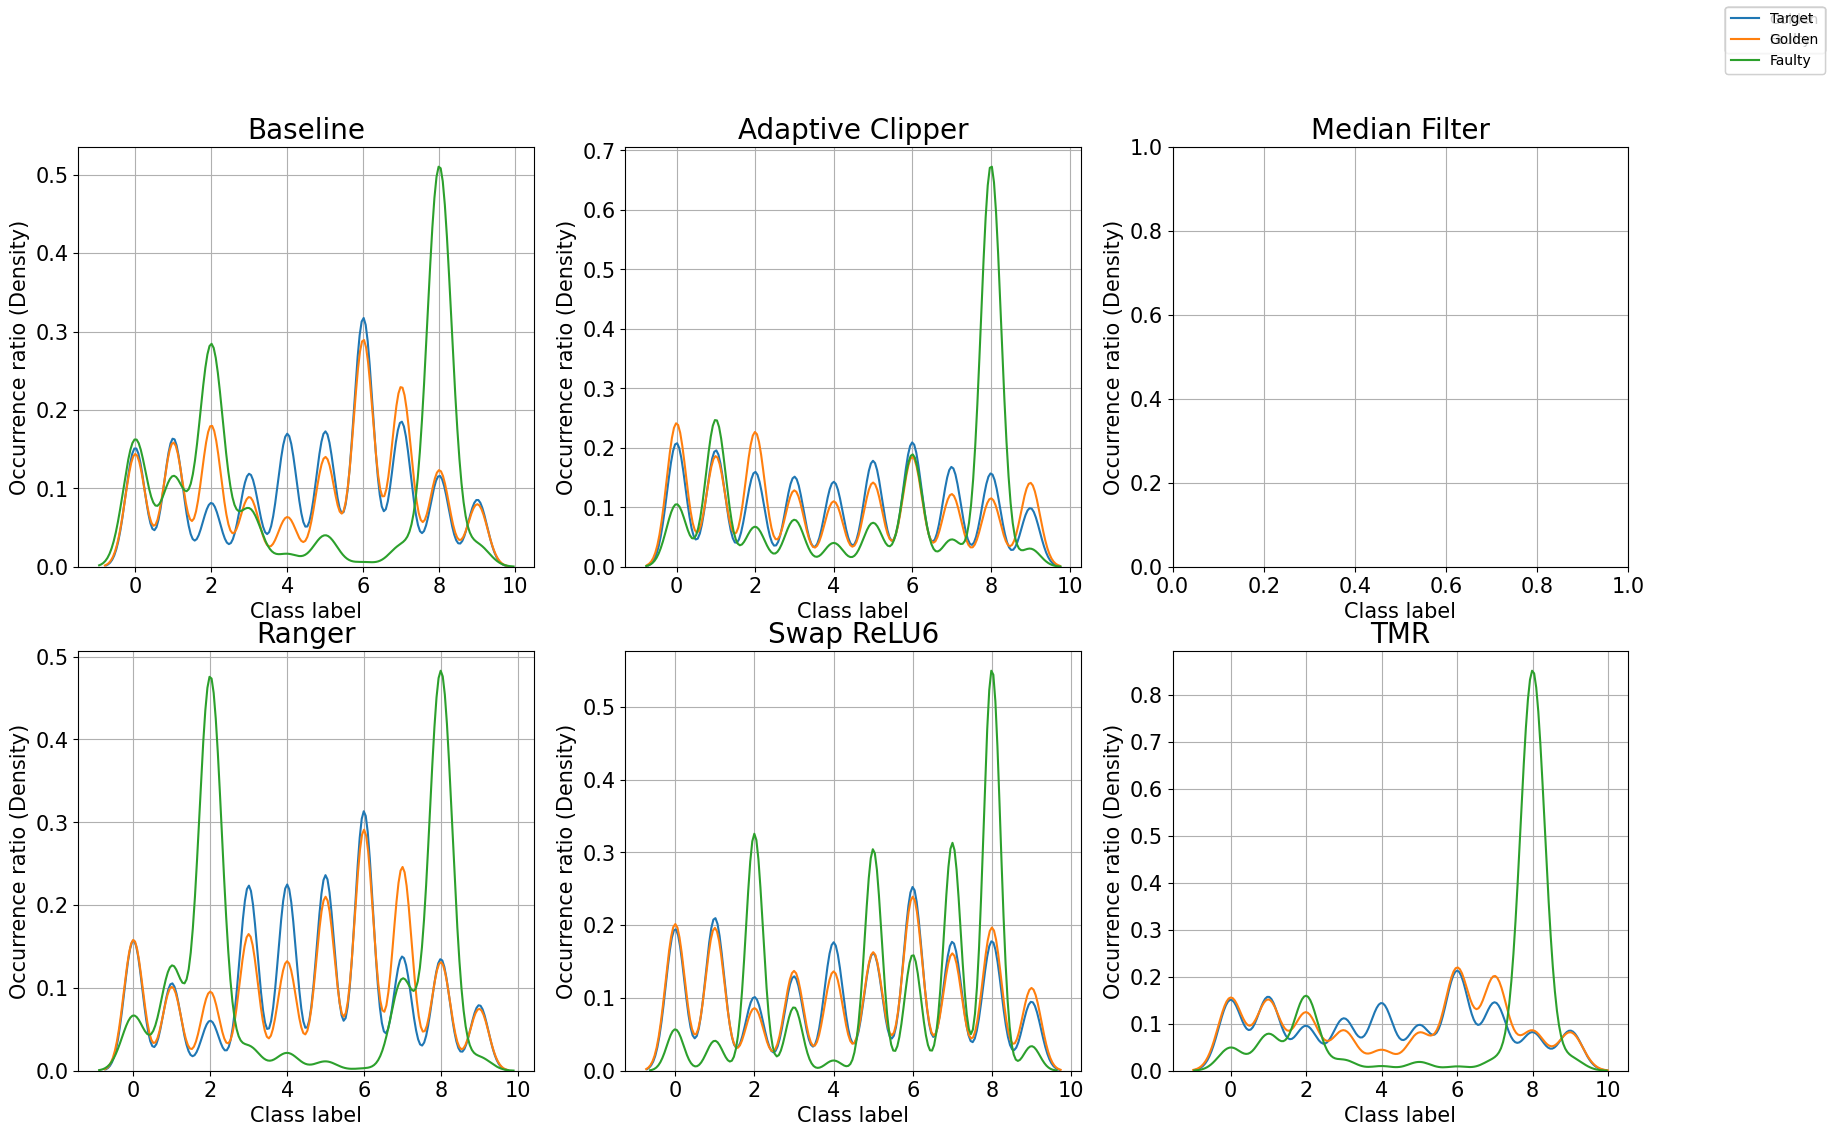

In [89]:
fig, ax = plt.subplots(2,3,figsize=(20,12))
sns.kdeplot(data=new_report[new_report['Architecture']=='Baseline'], x='G_Target', ax = ax[0][0], common_norm=True)
sns.kdeplot(data=new_report[new_report['Architecture']=='Baseline'], x='G_clas0', ax = ax[0][0], common_norm=True)
sns.kdeplot(data=new_report[new_report['Architecture']=='Baseline'], x='F_clas0', ax = ax[0][0], common_norm=True)
ax[0][0].set_title('Baseline', fontsize=20)
ax[0][0].grid()
ax[0][0].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[0][0].set_xlabel('Class label', fontsize=15)
ax[0][0].tick_params(axis='x', labelsize=15)
ax[0][0].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Target','Golden', 'Faulty'])

sns.kdeplot(data=new_report[new_report['Architecture']=='Adaptive Clipper'], x='G_Target', ax = ax[0][1], common_norm= True)
sns.kdeplot(data=new_report[new_report['Architecture']=='Adaptive Clipper'], x='G_clas0', ax = ax[0][1], common_norm= True)
sns.kdeplot(data=new_report[new_report['Architecture']=='Adaptive Clipper'], x='F_clas0', ax = ax[0][1], common_norm= True)
ax[0][1].set_title('Adaptive Clipper', fontsize=20)
ax[0][1].grid()
ax[0][1].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[0][1].set_xlabel('Class label', fontsize=15)
ax[0][1].tick_params(axis='x', labelsize=15)
ax[0][1].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Golden', 'Faulty'])

sns.kdeplot(data=new_report[new_report['Architecture']=='Median Filter'], x='G_Target', ax = ax[0][2], common_norm= True, common_grid=True)
sns.kdeplot(data=new_report[new_report['Architecture']=='Median Filter'], x='G_clas0', ax = ax[0][2], common_norm= True, common_grid=True)
sns.kdeplot(data=new_report[new_report['Architecture']=='Median Filter'], x='F_clas0', ax = ax[0][2], common_norm= True, common_grid=True)
ax[0][2].set_title('Median Filter', fontsize=20)
ax[0][2].grid()
ax[0][2].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[0][2].set_xlabel('Class label', fontsize=15)
ax[0][2].tick_params(axis='x', labelsize=15)
ax[0][2].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Golden', 'Faulty'])

sns.kdeplot(data=new_report[new_report['Architecture']=='Ranger'], x='G_Target', ax = ax[1][0], common_norm= True)
sns.kdeplot(data=new_report[new_report['Architecture']=='Ranger'], x='G_clas0', ax = ax[1][0], common_norm= True)
sns.kdeplot(data=new_report[new_report['Architecture']=='Ranger'], x='F_clas0', ax = ax[1][0], common_norm= True)
ax[1][0].set_title('Ranger', fontsize=20)
ax[1][0].grid()
ax[1][0].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[1][0].set_xlabel('Class label', fontsize=15)
ax[1][0].tick_params(axis='x', labelsize=15)
ax[1][0].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Golden', 'Faulty'])

sns.kdeplot(data=new_report[new_report['Architecture']=='Swap ReLU6'], x='G_Target', ax = ax[1][1], common_norm=True)
sns.kdeplot(data=new_report[new_report['Architecture']=='Swap ReLU6'], x='G_clas0', ax = ax[1][1], common_norm=True)
sns.kdeplot(data=new_report[new_report['Architecture']=='Swap ReLU6'], x='F_clas0', ax = ax[1][1], common_norm=True)
ax[1][1].set_title('Swap ReLU6', fontsize=20)
ax[1][1].grid()
ax[1][1].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[1][1].set_xlabel('Class label', fontsize=15)
ax[1][1].tick_params(axis='x', labelsize=15)
ax[1][1].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Golden', 'Faulty'])

sns.kdeplot(data=new_report[new_report['Architecture']=='TMR'], x='G_Target', ax = ax[1][2], common_norm=True)
sns.kdeplot(data=new_report[new_report['Architecture']=='TMR'], x='G_clas0', ax = ax[1][2], common_norm=True)
sns.kdeplot(data=new_report[new_report['Architecture']=='TMR'], x='F_clas0', ax = ax[1][2], common_norm=True)
ax[1][2].set_title('TMR', fontsize=20)
ax[1][2].grid()
ax[1][2].set_ylabel('Occurrence ratio (Density)', fontsize=15)
ax[1][2].set_xlabel('Class label', fontsize=15)
ax[1][2].tick_params(axis='x', labelsize=15)
ax[1][2].tick_params(axis='y', labelsize=15)
fig.legend(labels = ['Target','Golden', 'Faulty'])

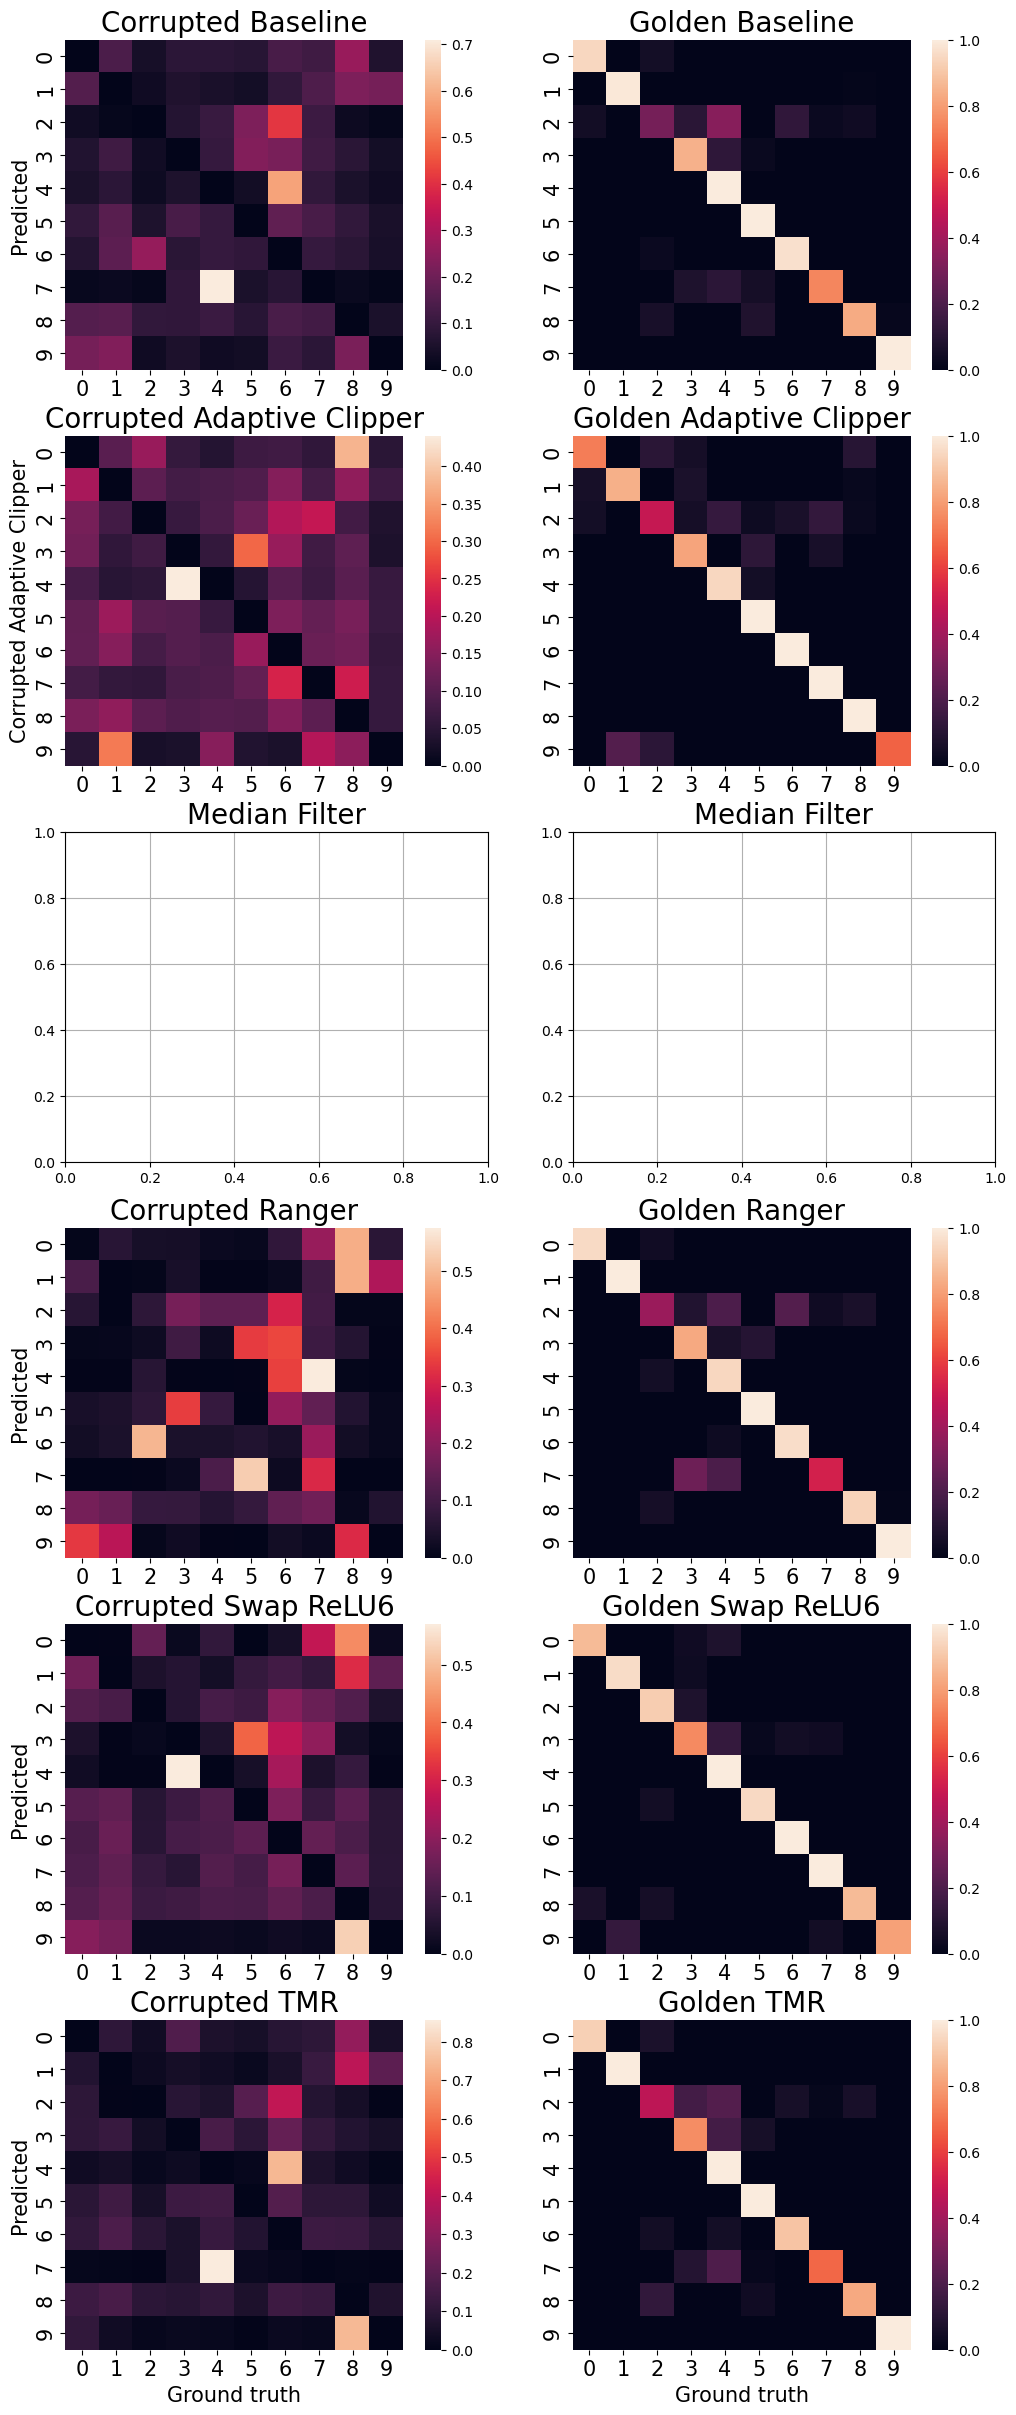

In [90]:
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(6,2,figsize=(12,30))
cm = confusion_matrix(new_report[new_report['Architecture']=='Baseline']['F_clas0'], new_report[new_report['Architecture']=='Baseline']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[0][0])
ax[0][0].set_title('Corrupted Baseline', fontsize=20)
# ax[0][0].grid()
ax[0][0].set_ylabel('Predicted', fontsize=15)
ax[0][0].set_xlabel('', fontsize=15)
ax[0][0].tick_params(axis='x', labelsize=15)
ax[0][0].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(new_report[new_report['Architecture']=='Baseline']['G_clas0'], new_report[new_report['Architecture']=='Baseline']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[0][1])
ax[0][1].set_title('Golden Baseline', fontsize=20)
# ax[0][1].grid()
ax[0][1].set_ylabel('', fontsize=15)
ax[0][1].set_xlabel('', fontsize=15)
ax[0][1].tick_params(axis='x', labelsize=15)
ax[0][1].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(new_report[new_report['Architecture']=='Adaptive Clipper']['F_clas0'], new_report[new_report['Architecture']=='Adaptive Clipper']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[1][0])
ax[1][0].set_title('Corrupted Adaptive Clipper', fontsize=20)
# ax[1][0].grid()
ax[1][0].set_ylabel('Corrupted Adaptive Clipper', fontsize=15)
ax[1][0].set_xlabel('', fontsize=15)
ax[1][0].tick_params(axis='x', labelsize=15)
ax[1][0].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(new_report[new_report['Architecture']=='Adaptive Clipper']['G_clas0'], new_report[new_report['Architecture']=='Adaptive Clipper']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[1][1])
ax[1][1].set_title('Golden Adaptive Clipper', fontsize=20)
# ax[1][1].grid()
ax[1][1].set_ylabel('', fontsize=15)
ax[1][1].set_xlabel('', fontsize=15)
ax[1][1].tick_params(axis='x', labelsize=15)
ax[1][1].tick_params(axis='y', labelsize=15)

# cm = confusion_matrix(new_report[new_report['Architecture']=='Median Filter']['F_clas0'], new_report[new_report['Architecture']=='Median Filter']['G_clas0'], normalize='true')
# sns.heatmap(cm, fmt="d", cbar=True, ax=ax[0][2])
ax[2][0].set_title('Median Filter', fontsize=20)
ax[2][0].grid()
# ax[2][0].set_ylabel('Predicted', fontsize=15)
# ax[2][0].set_xlabel('', fontsize=15)
# ax[2][0].tick_params(axis='x', labelsize=15)
# ax[2][0].tick_params(axis='y', labelsize=15)

# cm = confusion_matrix(new_report[new_report['Architecture']=='Median Filter']['G_clas0'], new_report[new_report['Architecture']=='Median Filter']['G_Target'], normalize='true')
# sns.heatmap(cm, fmt="d", cbar=True, ax=ax[0][2])
ax[2][1].set_title('Median Filter', fontsize=20)
ax[2][1].grid()
# ax[2][1].set_ylabel('Predicted', fontsize=15)
# ax[2][1].set_xlabel('', fontsize=15)
# ax[2][1].tick_params(axis='x', labelsize=15)
# ax[2][1].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(new_report[new_report['Architecture']=='Ranger']['F_clas0'], new_report[new_report['Architecture']=='Ranger']['G_clas0'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[3][0])
ax[3][0].set_title('Corrupted Ranger', fontsize=20)
# ax[3][0].grid()
ax[3][0].set_ylabel('Predicted', fontsize=15)
ax[3][0].set_xlabel('', fontsize=15)
ax[3][0].tick_params(axis='x', labelsize=15)
ax[3][0].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(new_report[new_report['Architecture']=='Ranger']['G_clas0'], new_report[new_report['Architecture']=='Ranger']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[3][1])
ax[3][1].set_title('Golden Ranger', fontsize=20)
# ax[3][1].grid()
ax[3][1].set_ylabel('', fontsize=15)
ax[3][1].set_xlabel('', fontsize=15)
ax[3][1].tick_params(axis='x', labelsize=15)
ax[3][1].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(new_report[new_report['Architecture']=='Swap ReLU6']['F_clas0'], new_report[new_report['Architecture']=='Swap ReLU6']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[4][0])
ax[4][0].set_title('Corrupted Swap ReLU6', fontsize=20)
# ax[4][0].grid()
ax[4][0].set_ylabel('Predicted', fontsize=15)
ax[4][0].set_xlabel('', fontsize=15)
ax[4][0].tick_params(axis='x', labelsize=15)
ax[4][0].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(new_report[new_report['Architecture']=='Swap ReLU6']['G_clas0'], new_report[new_report['Architecture']=='Swap ReLU6']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[4][1])
ax[4][1].set_title('Golden Swap ReLU6', fontsize=20)
# ax[4][1].grid()
ax[4][1].set_ylabel('', fontsize=15)
ax[4][1].set_xlabel('', fontsize=15)
ax[4][1].tick_params(axis='x', labelsize=15)
ax[4][1].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(new_report[new_report['Architecture']=='TMR']['F_clas0'], new_report[new_report['Architecture']=='TMR']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[5][0])
ax[5][0].set_title('Corrupted TMR', fontsize=20)
# ax[5][0].grid()
ax[5][0].set_ylabel('Predicted', fontsize=15)
ax[5][0].set_xlabel('Ground truth', fontsize=15)
ax[5][0].tick_params(axis='x', labelsize=15)
ax[5][0].tick_params(axis='y', labelsize=15)

cm = confusion_matrix(new_report[new_report['Architecture']=='TMR']['G_clas0'], new_report[new_report['Architecture']=='TMR']['G_Target'], normalize='true')
sns.heatmap(cm, fmt="d", cbar=True, ax=ax[5][1])
ax[5][1].set_title('Golden TMR', fontsize=20)
# ax[5][1].grid()
ax[5][1].set_ylabel('', fontsize=15)
ax[5][1].set_xlabel('Ground truth', fontsize=15)
ax[5][1].tick_params(axis='x', labelsize=15)
ax[5][1].tick_params(axis='y', labelsize=15)